# Project 7: Recommendation Systems

### Objective:
    Build a recommendation system to recommend products to customers based on the their previous ratings for other products.
### Dataset:
    Amazon Reviews data(Electronics dataset)
### Attribute Information:
    userId : Every user identified with a unique id
    productId : Every product identified with a unique id
    Rating : Rating of the corresponding product by the corresponding user
    timestamp : Time of the rating

In [1]:
# Import Libraries

import os
import numpy as np  
import pandas as pd

In [2]:
ratings = pd.read_csv('C:\\Users\\exsxaxr\\Downloads\\ratings_Electronics.csv', names=['userID', 'productID', 'Rating', 'timestamp'])

In [3]:
ratings.head()

,userID,productID,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userID       object
productID    object
Rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
ratings.shape

(7824482, 4)

In [61]:
# Since the dataset is huge, we are taking count of only users who has rated more than 50 times

df = ratings[ratings['userID'].isin(ratings['userID'].value_counts()[ratings['userID'].value_counts() >= 50].index)]

In [7]:
df .head()

,userID,productID,Rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [8]:
df.shape

(125871, 4)

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 4 columns):
userID       125871 non-null object
productID    125871 non-null object
Rating       125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [11]:
df.isnull().sum()

userID       0
productID    0
Rating       0
timestamp    0
dtype: int64

In [12]:
# We can drop timestamp feature as it is not gonna help us in model building

df.drop('timestamp',axis=1, inplace=True)

In [13]:
df.head()

,userID,productID,Rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,125871.0,4.261339,1.062144,1.0,4.0,5.0,5.0,5.0


In [15]:
# The ratings are on scale of 1 to 5

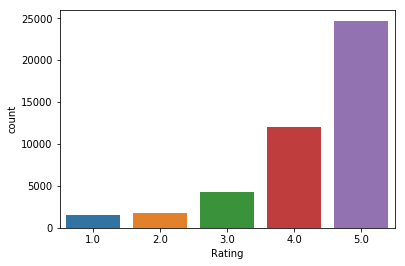

In [78]:
import seaborn as sns
sns.countplot("Rating", data=df)

In [17]:
# Number of unique user id and product id in the data

df['userID'].nunique()

1540

In [18]:
df['productID'].nunique()

48190

In [19]:
# Creating pivot table and replacing NAN with mean value

df_matrix = df.pivot(index='userID', columns='productID', values='Rating').fillna(0)
df_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_matrix.shape

(1540, 48190)

In [21]:
# Total number of ratings given

total_ratings = np.count_nonzero(df_matrix)
total_ratings

125871

In [22]:
# Possible number of ratings

possible_ratings = df_matrix.shape[0] * df_matrix.shape[1]
possible_ratings

74212600

In [23]:
# Split data into training and test set

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.3, random_state=0)
train_data.head()

,userID,productID,Rating
103386,A2BYV7S1QP2YIG,B009EAHVTA,5.0
78138,AB094YABX21WQ,B0056XCEAA,1.0
70422,A3D0UM4ZD2CMAW,B004I763AW,5.0
63841,AATWFX0ZZSE6C,B0040NPHMO,3.0
31241,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [24]:
train_data.shape

(88109, 3)

In [25]:
test_data.shape

(37762, 3)

## Popularity Recommender Model

In [26]:
train_data_grouped = train_data.groupby('productID').agg({'userID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userID': 'score'},inplace=True)
train_data_grouped.head()

,productID,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [27]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productID'], ascending = [False,True]) 

In [28]:
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=False, method='first') 

In [29]:
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productID,score,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0


In [30]:
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
    
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [31]:
find_recom = [1,2,3,4]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 1

       userID   productID  score  Rank
30847       1  B0088CJT4U    133   1.0
30287       1  B007WTAJTO    124   2.0
19647       1  B003ES5ZUU    122   3.0
8752        1  B000N99BBC    114   4.0
30555       1  B00829THK0     97   5.0


Here is the recommendation for the userId: 2

       userID   productID  score  Rank
30847       2  B0088CJT4U    133   1.0
30287       2  B007WTAJTO    124   2.0
19647       2  B003ES5ZUU    122   3.0
8752        2  B000N99BBC    114   4.0
30555       2  B00829THK0     97   5.0


Here is the recommendation for the userId: 3

       userID   productID  score  Rank
30847       3  B0088CJT4U    133   1.0
30287       3  B007WTAJTO    124   2.0
19647       3  B003ES5ZUU    122   3.0
8752        3  B000N99BBC    114   4.0
30555       3  B00829THK0     97   5.0


Here is the recommendation for the userId: 4

       userID   productID  score  Rank
30847       4  B0088CJT4U    133   1.0
30287       4  B007WTAJTO    1

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
# As we can see, the recommendation is common for all the users.

## Collaborative Filtering Model

In [33]:
df.head()

,userID,productID,Rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [34]:
df_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Replacing index with numeric values 

df_matrix['User_Index'] = np.arange(0,df_matrix.shape[0],1)
df_matrix.set_index(['User_Index'], inplace = True)
df_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
User_Index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# SVD Method

from scipy.sparse.linalg import svds

U, sigma, Vt = svds(df_matrix, k = 20)
sigma = np.diag(sigma)

In [37]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [38]:
df_pred = pd.DataFrame(predicted_ratings, columns=df_matrix.columns)
df_pred.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003876,0.001776,0.004922,0.006622,0.006877,0.003483,0.012387,0.003402,0.020291,0.003104,...,0.000623,0.046544,0.007169,0.027142,0.004910,0.006308,0.002499,0.000522,0.014742,0.020008
1,0.001126,0.000205,-0.001408,0.065616,0.008467,-0.002362,0.027369,0.000521,0.006904,-0.002007,...,0.000026,0.067988,0.002044,0.001330,-0.005504,-0.000001,0.004543,-0.144943,-0.021688,0.008607
2,-0.001514,-0.002423,0.003768,-0.000785,0.004813,-0.001769,0.003223,0.003483,-0.009064,-0.001268,...,-0.000321,0.005307,-0.001186,-0.008520,0.018903,-0.002752,-0.000352,0.001187,-0.000520,-0.005780
3,0.002069,0.005250,-0.002713,0.009402,0.001787,0.001459,0.001182,-0.001332,0.005723,0.001268,...,0.000542,0.008154,0.002219,0.004530,-0.002591,0.000799,0.003277,-0.026123,-0.001513,0.000888
4,0.000926,-0.001528,0.004633,0.021598,0.005729,0.001196,0.011140,0.002276,0.004330,0.001203,...,0.000227,0.005246,0.001660,-0.024548,0.000231,-0.003026,-0.000111,-0.042681,-0.017880,-0.001952


In [39]:
# Recommend items with highest predicted ratings

def recommend_items(userID, df_matrix, df_pred, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = df_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    sorted_user_predictions = df_pred.iloc[user_idx].sort_values(ascending=False)

    final = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    final.index.name = 'Recommended Items'
    final.columns = ['user_ratings', 'user_predictions']
    
    # Taking the products where the ratings are zero i.e. not rated
    final = final.loc[final.user_ratings == 0]   
    final = final.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(final.head(num_recommendations))

In [40]:
userID = 5
num_recommendations = 5
recommend_items(userID, df_matrix, df_pred, num_recommendations)


Below are the recommended items for user(user_id = 5):

                   user_ratings  user_predictions
Recommended Items                                
B003ES5ZUU                  0.0          0.830890
B0088CJT4U                  0.0          0.669930
B008DWCRQW                  0.0          0.645077
B00829TIEK                  0.0          0.597120
B000N99BBC                  0.0          0.563619


C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [41]:
userID = 50
num_recommendations = 5
recommend_items(userID, df_matrix, df_pred, num_recommendations)

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':



Below are the recommended items for user(user_id = 50):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.765209
B00829TIEK                  0.0          1.181317
B002R5AM7C                  0.0          1.164927
B004CLYEDC                  0.0          1.028721
B00829THK0                  0.0          0.768384


In [42]:
userID = 120
num_recommendations = 5
recommend_items(userID, df_matrix, df_pred, num_recommendations)

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':



Below are the recommended items for user(user_id = 120):

                   user_ratings  user_predictions
Recommended Items                                
B00829TIEK                  0.0          3.159991
B004CLYEDC                  0.0          2.027900
B00829TIA4                  0.0          1.993844
B008DWCRQW                  0.0          1.959274
B003ES5ZUU                  0.0          1.888727


In [43]:
# Here we can see the recommendations are different for each users
# which means it is more personalized in collaborative filtering

In [44]:
# Evaluation of the model

# Actual ratings given by the user

df_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
User_Index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_matrix.mean().head()

productID
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [46]:
# Predicted rating

df_pred.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003876,0.001776,0.004922,0.006622,0.006877,0.003483,0.012387,0.003402,0.020291,0.003104,...,0.000623,0.046544,0.007169,0.027142,0.004910,0.006308,0.002499,0.000522,0.014742,0.020008
1,0.001126,0.000205,-0.001408,0.065616,0.008467,-0.002362,0.027369,0.000521,0.006904,-0.002007,...,0.000026,0.067988,0.002044,0.001330,-0.005504,-0.000001,0.004543,-0.144943,-0.021688,0.008607
2,-0.001514,-0.002423,0.003768,-0.000785,0.004813,-0.001769,0.003223,0.003483,-0.009064,-0.001268,...,-0.000321,0.005307,-0.001186,-0.008520,0.018903,-0.002752,-0.000352,0.001187,-0.000520,-0.005780
3,0.002069,0.005250,-0.002713,0.009402,0.001787,0.001459,0.001182,-0.001332,0.005723,0.001268,...,0.000542,0.008154,0.002219,0.004530,-0.002591,0.000799,0.003277,-0.026123,-0.001513,0.000888
4,0.000926,-0.001528,0.004633,0.021598,0.005729,0.001196,0.011140,0.002276,0.004330,0.001203,...,0.000227,0.005246,0.001660,-0.024548,0.000231,-0.003026,-0.000111,-0.042681,-0.017880,-0.001952


In [47]:
df_pred.mean().head()

productID
0594451647    0.001606
0594481813    0.002241
0970407998    0.003374
0972683275    0.012458
1400501466    0.005045
dtype: float64

In [48]:
# Calculating RMSE

rmse = pd.concat([df_matrix.mean(), df_pred.mean()], axis=1)
rmse.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse.shape)
rmse['item_index'] = np.arange(0, rmse.shape[0], 1)
rmse.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productID,,,
0594451647,0.003247,0.001606,0
0594481813,0.001948,0.002241,1
0970407998,0.003247,0.003374,2
0972683275,0.012338,0.012458,3
1400501466,0.012987,0.005045,4


In [49]:
RMSE = round((((rmse.Avg_actual_ratings - rmse.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print("RMSE = ", RMSE)

RMSE =  0.00317


### Collaborative filtering using KNN Means

In [62]:
# User based collaborative system

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['userID', 'productID', 'Rating']], reader)

In [63]:
trainset, testset = train_test_split(data, test_size=.15)
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [64]:
test_pred = algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [74]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [75]:
test_pred

[Prediction(uid='A2JE071UW97J2A', iid='B003HULYJQ', r_ui=5.0, est=4.27766985123879, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B002BS0OOG', r_ui=4.0, est=4.27766985123879, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2NYK9KWFMJV4Y', iid='B00I9GU1QU', r_ui=5.0, est=4.27766985123879, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2AY4YUOX2N1BQ', iid='B00196HV4C', r_ui=4.0, est=4.27766985123879, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A24HWYHR28JJ7A', iid='B0029QGQ5Q', r_ui=5.0, est=4.27766985123879, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1KKE6VX8VPWZK', iid='B002TLTE6Y', r_ui=5.0, est=5, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B0000ACOW2', r_ui=5.0, est=4.277669851238

### Summary:

-> Since the dataset is huge, we have taken a subset by selecting only the users who have rated for more than 50 time

-> Then popularity recommendation model is applied and the recommendation is same for all user

-> So popularity recommendation model is not personalized.

-> Then, collaborative filtering model with SVD was applied and we got a more user personalized model

-> The same was tested with item item collaborative model with KNN means

-> Collaborative model with SVD was givinig more personalized results and 
   can be considered as the best recommendation model for this dataset